In [454]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn-paper')
plt.rc('font',family='Times New Roman')
import seaborn as sns
import pandas as pd
sns.set_theme(style="ticks")
import joblib
import numpy as np

In [455]:
data=pd.read_excel("Problem_C_Data_Wordle.xlsx")
data=data.sort_values(by="Date")
data=data.reset_index().drop(columns="index")
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 Try,2 Tries,3 Tries,4 Tries,5 Tries,6 Tries,Above 6 Tries
0,2022-01-07,202,slump,80630,1362,0.01,0.03,0.23,0.39,0.24,0.09,0.01
1,2022-01-08,203,crank,101503,1763,0.01,0.05,0.23,0.31,0.24,0.14,0.02
2,2022-01-09,204,gorge,91477,1913,0.01,0.03,0.13,0.27,0.30,0.22,0.04
3,2022-01-10,205,query,107134,2242,0.01,0.04,0.16,0.30,0.30,0.17,0.02
4,2022-01-11,206,drink,153880,3017,0.01,0.09,0.35,0.34,0.16,0.05,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0.00,0.02,0.17,0.35,0.29,0.14,0.03
355,2022-12-28,557,impel,20160,1937,0.00,0.03,0.21,0.40,0.25,0.09,0.01
356,2022-12-29,558,havoc,20001,1919,0.00,0.02,0.16,0.38,0.30,0.12,0.02
357,2022-12-30,559,molar,21204,1973,0.00,0.04,0.21,0.38,0.26,0.09,0.01


In [456]:
data.columns

Index(['Date', 'Contest number', 'Word', 'Number of reported results',
       'Number in hard mode', '1 Try', '2 Tries', '3 Tries', '4 Tries',
       '5 Tries', '6 Tries', 'Above 6 Tries'],
      dtype='object')

In [458]:
#平稳性检验
#检验平稳性
from statsmodels.tsa.stattools import adfuller
contain=['name','Z(t)','p.value','1%','5%','10%','Stability']
reslut_test=pd.DataFrame(columns=contain)

columns=['Number of reported results','Number in hard mode', '1 Try', '2 Tries', '3 Tries', '4 Tries','5 Tries', '6 Tries', 'Above 6 Tries']

for i,j in enumerate(columns):
    dftest = adfuller(data[j],autolag='AIC')
    if dftest[1]>0.05:
        reslut_test=reslut_test.append({'name':columns[i],'Z(t)':dftest[0],'p.value':dftest[1],'1%':dftest[4]['1%'],'5%':dftest[4]['5%'],'10%':dftest[4]['10%'],'Stability':"Unstable"},ignore_index=True)
    else:
        reslut_test=reslut_test.append({'name':columns[i],'Z(t)':dftest[0],'p.value':dftest[1],'1%':dftest[4]['1%'],'5%':dftest[4]['5%'],'10%':dftest[4]['10%'],'Stability':"Stable"},ignore_index=True)
reslut_test.to_excel("平稳性检验2.xlsx")
reslut_test

C:\Users\aa271\AppData\Local\Temp\ipykernel_7740\42390637.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reslut_test=reslut_test.append({'name':columns[i],'Z(t)':dftest[0],'p.value':dftest[1],'1%':dftest[4]['1%'],'5%':dftest[4]['5%'],'10%':dftest[4]['10%'],'Stability':"Stable"},ignore_index=True)
C:\Users\aa271\AppData\Local\Temp\ipykernel_7740\42390637.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reslut_test=reslut_test.append({'name':columns[i],'Z(t)':dftest[0],'p.value':dftest[1],'1%':dftest[4]['1%'],'5%':dftest[4]['5%'],'10%':dftest[4]['10%'],'Stability':"Unstable"},ignore_index=True)
C:\Users\aa271\AppData\Local\Temp\ipykernel_7740\42390637.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reslut_test=

,name,Z(t),p.value,1%,5%,10%,Stability
0,Number of reported results,-3.918629,1.901943e-03,-3.449673,-2.870053,-2.571306,Stable
1,Number in hard mode,-1.333257,6.138232e-01,-3.449065,-2.869786,-2.571163,Unstable
2,1 Try,-6.085440,1.067190e-07,-3.448958,-2.869739,-2.571138,Stable
3,2 Tries,-18.422840,2.174871e-30,-3.448749,-2.869647,-2.571089,Stable
4,3 Tries,-7.636992,1.940579e-11,-3.448906,-2.869716,-2.571126,Stable
5,4 Tries,-18.613449,2.064192e-30,-3.448749,-2.869647,-2.571089,Stable
6,5 Tries,-17.473053,4.531769e-30,-3.448749,-2.869647,-2.571089,Stable
7,6 Tries,-18.262958,2.328860e-30,-3.448749,-2.869647,-2.571089,Stable
8,Above 6 Tries,-20.230661,0.000000e+00,-3.448749,-2.869647,-2.571089,Stable


# 基于自身的时间序列预测

In [450]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from blitz.modules import BayesianLSTM
from blitz.utils import variational_estimator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

from collections import deque

In [451]:
df = data.copy()
window_size = 10

In [452]:
df = data.copy()
df2=pd.read_excel("Problem_C_Data_Wordle_test.xlsx")
df2=df2.sort_values(by="Date")
df2=df2.reset_index().drop(columns="index")
df=df.append(df2)
df

C:\Users\aa271\AppData\Local\Temp\ipykernel_7740\2959113360.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2)


,Date,Contest number,Word,Number of reported results,Number in hard mode,1 Try,2 Tries,3 Tries,4 Tries,5 Tries,6 Tries,Above 6 Tries
0,2022-01-07,202,slump,80630,1362,0.01,0.03,0.23,0.39,0.24,0.09,0.01
1,2022-01-08,203,crank,101503,1763,0.01,0.05,0.23,0.31,0.24,0.14,0.02
2,2022-01-09,204,gorge,91477,1913,0.01,0.03,0.13,0.27,0.30,0.22,0.04
3,2022-01-10,205,query,107134,2242,0.01,0.04,0.16,0.30,0.30,0.17,0.02
4,2022-01-11,206,drink,153880,3017,0.01,0.09,0.35,0.34,0.16,0.05,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
41,2023-02-11,603,giant,20926,1990,0.01,0.08,0.38,0.36,0.14,0.03,0.00
42,2023-02-12,604,usage,20060,1889,0.00,0.04,0.32,0.39,0.19,0.06,0.01
43,2023-02-13,605,sound,23229,2223,0.01,0.13,0.33,0.26,0.14,0.08,0.04
44,2023-02-14,606,salsa,20108,1994,0.00,0.02,0.14,0.34,0.32,0.14,0.02


In [453]:
df["Number of reported results"]=df["Number of reported results"].diff()
df=df.dropna()
df=df.reset_index()
df

,index,Date,Contest number,Word,Number of reported results,Number in hard mode,1 Try,2 Tries,3 Tries,4 Tries,5 Tries,6 Tries,Above 6 Tries
0,1,2022-01-08,203,crank,20873.0,1763,0.01,0.05,0.23,0.31,0.24,0.14,0.02
1,2,2022-01-09,204,gorge,-10026.0,1913,0.01,0.03,0.13,0.27,0.30,0.22,0.04
2,3,2022-01-10,205,query,15657.0,2242,0.01,0.04,0.16,0.30,0.30,0.17,0.02
3,4,2022-01-11,206,drink,46746.0,3017,0.01,0.09,0.35,0.34,0.16,0.05,0.01
4,5,2022-01-12,207,favor,-16294.0,3073,0.01,0.04,0.15,0.26,0.29,0.21,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,41,2023-02-11,603,giant,1585.0,1990,0.01,0.08,0.38,0.36,0.14,0.03,0.00
400,42,2023-02-12,604,usage,-866.0,1889,0.00,0.04,0.32,0.39,0.19,0.06,0.01
401,43,2023-02-13,605,sound,3169.0,2223,0.01,0.13,0.33,0.26,0.14,0.08,0.04
402,44,2023-02-14,606,salsa,-3121.0,1994,0.00,0.02,0.14,0.34,0.32,0.14,0.02


In [258]:
ResultsNumberAll = df["Number of reported results"]
scaler = StandardScaler()
ResultsNumberAll_arr = np.array(ResultsNumberAll).reshape(-1, 1)
ResultsNumberAll = scaler.fit_transform(ResultsNumberAll_arr)
ResultsNumberAll_unscaled = df["Number of reported results"]

In [259]:
def create_timestamps_ds(series,
                         timestep_size=window_size):
    time_stamps = []
    labels = []
    aux_deque = deque(maxlen=timestep_size)

    #starting the timestep deque
    for i in range(timestep_size):
        aux_deque.append(0)

    #feed the timestamps list
    for i in range(len(series) - 1):
        aux_deque.append(series[i])
        time_stamps.append(list(aux_deque))

    #feed the labels lsit
    for i in range(len(series) - 1):
        labels.append(series[i + 1])

    assert len(time_stamps) == len(labels), "Something went wrong"

    #torch-tensoring it
    features = torch.tensor(time_stamps[timestep_size:]).float()
    labels = torch.tensor(labels[timestep_size:]).float()

    return features, labels


class Mish(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self,x):
        x=x*(torch.tanh(F.softplus(x)))
        return x

@variational_estimator
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.lstm_1 = BayesianLSTM(1, 50, prior_sigma_1=1, prior_pi=1, posterior_rho_init=-3.0)
        self.linear = nn.Linear(50, 1)

    def forward(self, x):
        x_, _ = self.lstm_1(x)
        x_=F.dropout(x_,p=0.7)
        #gathering only the latent end-of-sequence for the linear layer
        x_ = x_[:, -1, :]
        x_ = self.linear(x_)
        return x_

In [260]:
Xs, ys = create_timestamps_ds(ResultsNumberAll)
X_train, X_test, y_train, y_test = train_test_split(Xs,
                                                    ys,
                                                    test_size=.25,
                                                    random_state=42,
                                                    shuffle=False)



ds = torch.utils.data.TensorDataset(X_train, y_train)
dataloader_train = torch.utils.data.DataLoader(ds, batch_size=8, shuffle=True)

net = NN()

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [261]:
iteration = 0
for epoch in range(100):
    for i, (datapoints, labels) in enumerate(dataloader_train):
        optimizer.zero_grad()

        loss = net.sample_elbo(inputs=datapoints,
                               labels=labels,
                               criterion=criterion,
                               sample_nbr=3,
                               complexity_cost_weight=1/X_train.shape[0])
        loss.backward()
        optimizer.step()

        iteration += 1
        if iteration%250==0:
            preds_test = net(X_test)[:,0].unsqueeze(1)
            loss_test = criterion(preds_test, y_test)
            print("Iteration: {} Val-loss: {:.4f}".format(str(iteration), loss_test))

Iteration: 250 Val-loss: 0.0298
Iteration: 500 Val-loss: 0.0270
Iteration: 750 Val-loss: 0.0336
Iteration: 1000 Val-loss: 0.0252
Iteration: 1250 Val-loss: 0.0264
Iteration: 1500 Val-loss: 0.0346
Iteration: 1750 Val-loss: 0.0349
Iteration: 2000 Val-loss: 0.0471
Iteration: 2250 Val-loss: 0.0331
Iteration: 2500 Val-loss: 0.0437
Iteration: 2750 Val-loss: 0.0435
Iteration: 3000 Val-loss: 0.0368
Iteration: 3250 Val-loss: 0.0353
Iteration: 3500 Val-loss: 0.0425


In [262]:
#pred_unscaled
original = ResultsNumberAll_unscaled[1:][window_size:]
df_pred = pd.DataFrame(original)
df_pred["Date"] = df.Date
df["Date"] = pd.to_datetime(df_pred["Date"])
df_pred = df_pred.reset_index()
#df_pred = df_pred.set_index('Date')

In [302]:
def pred_stock_future(X_test,
                      future_length,
                      sample_nbr=10):
    #sorry for that, window_size is a global variable, and so are X_train and Xs
    global window_size
    global X_train
    global Xs
    global scaler

    #creating auxiliar variables for future prediction
    preds_test = []
    test_begin = X_test[0:1, :, :]
    test_deque = deque(test_begin[0, :, 0].tolist(), maxlen=window_size)

    idx_pred = np.arange(len(X_train), len(Xs))

    #predict it and append to list
    for i in range(len(X_test)):
        #print(i)
        as_net_input = torch.tensor(test_deque).unsqueeze(0).unsqueeze(2)
        pred = [net(as_net_input).cpu().item() for i in range(sample_nbr)]

        test_deque.append(torch.tensor(pred).mean().cpu().item())
        preds_test.append(pred)

        if i % future_length == 0:
            #our inptus become the i index of our X_test
            #That tweak just helps us with shape issues
            test_begin = X_test[i:i + 1, :, :]
            test_deque = deque(test_begin[0, :, 0].tolist(), maxlen=window_size)

    #preds_test = np.array(preds_test).reshape(-1, 1)
    #preds_test_unscaled = scaler.inverse_transform(preds_test)

    return idx_pred, preds_test


def get_confidence_intervals(preds_test, ci_multiplier):
    global scaler

    preds_test = torch.tensor(preds_test)

    pred_mean = preds_test.mean(1)
    pred_std = preds_test.std(1).detach().cpu().numpy()

    pred_std = torch.tensor((pred_std))
    #print(pred_std)

    upper_bound = pred_mean + (pred_std * ci_multiplier)
    lower_bound = pred_mean - (pred_std * ci_multiplier)
    #gather unscaled confidence intervals

    pred_mean_final = pred_mean.unsqueeze(1).detach().cpu().numpy()
    pred_mean_unscaled = scaler.inverse_transform(pred_mean_final)

    upper_bound_unscaled = upper_bound.unsqueeze(1).detach().cpu().numpy()
    upper_bound_unscaled = scaler.inverse_transform(upper_bound_unscaled)

    lower_bound_unscaled = lower_bound.unsqueeze(1).detach().cpu().numpy()
    lower_bound_unscaled = scaler.inverse_transform(lower_bound_unscaled)

    return pred_mean_unscaled, upper_bound_unscaled, lower_bound_unscaled

In [355]:
future_length = 7
sample_nbr = 4
ci_multiplier = 5
idx_pred, preds_test = pred_stock_future(X_test, future_length, sample_nbr)
pred_mean_unscaled, upper_bound_unscaled, lower_bound_unscaled = get_confidence_intervals(preds_test,
                                                                                          ci_multiplier)
y = np.array(df["Number of reported results"][-len(upper_bound_unscaled):]).reshape(-1, 1)
under_upper = upper_bound_unscaled > y
over_lower = lower_bound_unscaled < y
total = (under_upper == over_lower)

print("{} our predictions are in our confidence interval".format(np.mean(total)))

0.9595959595959596 our predictions are in our confidence interval


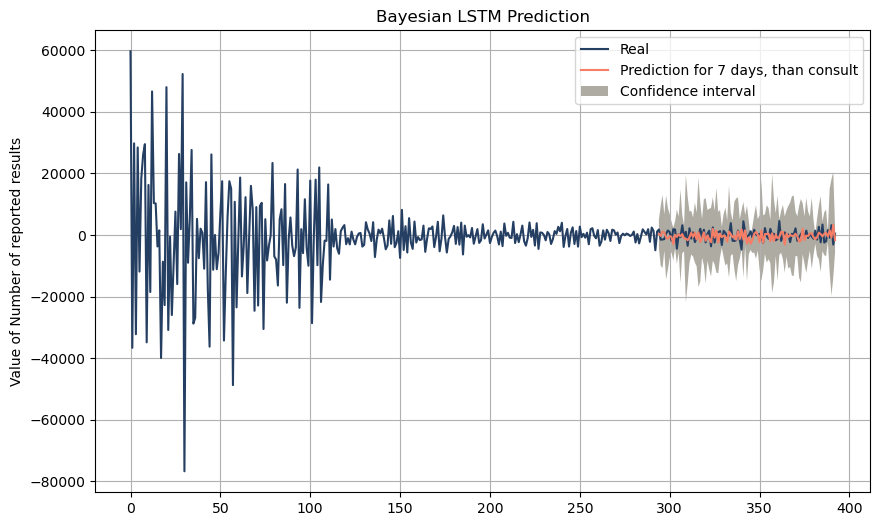

In [265]:
plt.figure(figsize=(10,6))

params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black"}

plt.rcParams.update(params)


plt.plot(df_pred.index,
         df_pred["Number of reported results"],
         color='#253F63',
         label="Real")

plt.plot(idx_pred,
         pred_mean_unscaled,
         label="Prediction for {} days, than consult".format(future_length),
         color="#F77E66")

plt.fill_between(x=idx_pred,
                 y1=upper_bound_unscaled[:,0],
                 y2=lower_bound_unscaled[:,0],
                 facecolor='#5E5946',
                 label="Confidence interval",
                 alpha=0.5)

plt.title("Bayesian LSTM Prediction")
plt.ylabel("Value of Number of reported results")
plt.grid()
plt.legend()
plt.savefig("predictTS.svg")

In [410]:
future_length = 7
sample_nbr = 4
ci_multiplier = 5
idx_pred, preds_test = pred_stock_future(predictX, future_length, sample_nbr)
pred_mean_unscaled, upper_bound_unscaled, lower_bound_unscaled = get_confidence_intervals(preds_test,
                                                                                          ci_multiplier)
y = np.array(df["Number of reported results"][-len(upper_bound_unscaled):]).reshape(-1, 1)
under_upper = upper_bound_unscaled > y
over_lower = lower_bound_unscaled < y
total = (under_upper == over_lower)

print("{} our predictions are in our confidence interval".format(np.mean(total)))

IndexError: too many indices for tensor of dimension 2

In [447]:
datanewtemp=ResultsNumberAll[-12:].copy()
datanew=ResultsNumberAll[-12:].copy()
datamonth=ResultsNumberAll_unscaled[-12:].copy()
yp=[]
up=[]
lp=[]

for i in range(100):
    predictX,predictY=create_timestamps_ds(datanewtemp.reshape(-1, 1),timestep_size=10)
    idx_pred, preds_test = pred_stock_future(predictX, future_length, sample_nbr)
    pred_mean_unscaled, upper_bound_unscaled, lower_bound_unscaled = get_confidence_intervals(preds_test,
                                                                                              ci_multiplier)
    up.append(upper_bound_unscaled[0][0])
    lp.append(lower_bound_unscaled[0][0])
    yp.append(pred_mean_unscaled[0][0])

    datanew=np.append(datanew,scaler.transform(pred_mean_unscaled.reshape(-1, 1)))
    datanewtemp=datanew[-12:]

In [444]:
datanewtemp=ResultsNumberAll[-12:].copy()
datanew=ResultsNumberAll[-12:].copy()
predictX,predictY=create_timestamps_ds(datanewtemp.reshape(-1, 1),timestep_size=10)

In [449]:
ResultsNumberAll_unscaled[-12:]

392    1395.0
393   -1504.0
394    2643.0
395   -2378.0
396    3376.0
397   -2464.0
398   -2010.0
399    1585.0
400    -866.0
401    3169.0
402   -3121.0
403     448.0
Name: Number of reported results, dtype: float64

In [448]:
pd.DataFrame(data=[yp,lp,up]).T.to_csv("predict2.csv")

In [445]:
predictY

tensor([[0.0494]])

In [446]:
datanewtemp

array([[ 0.12782727],
       [-0.11222697],
       [ 0.231169  ],
       [-0.1845993 ],
       [ 0.2918657 ],
       [-0.19172061],
       [-0.15412674],
       [ 0.14356038],
       [-0.05939682],
       [ 0.27472489],
       [-0.24612407],
       [ 0.0494101 ]])

In [216]:
a=pd.DataFrame(pred_mean_unscaled).join(df[-len(pred_mean_unscaled):].reset_index())
a=a.join(pd.DataFrame(upper_bound_unscaled[:,0],columns=["U"]))
a=a.join(pd.DataFrame(lower_bound_unscaled[:,0],columns=["L"]))

In [217]:
a.to_csv("predict.csv")

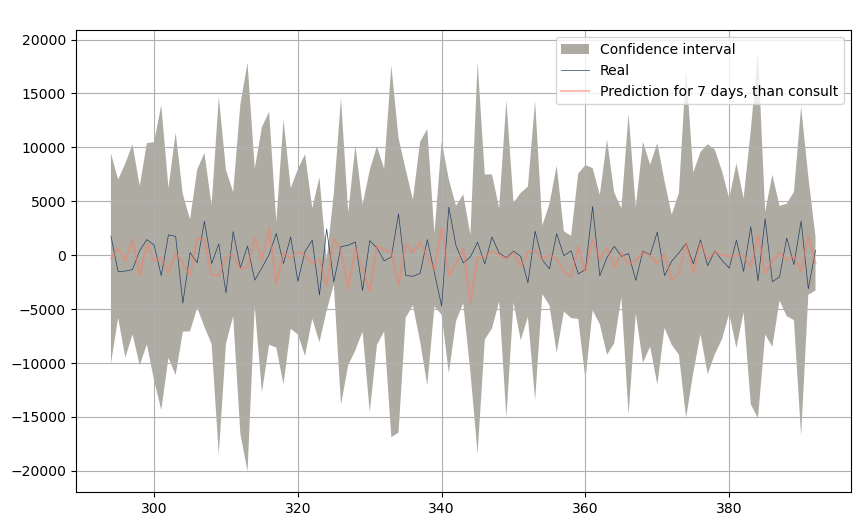

In [220]:
plt.figure(figsize=(10,6))

params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black"}
plt.rcParams.update(params)

plt.title("IBM Stock prices", color="white")


plt.fill_between(x=idx_pred,
                 y1=upper_bound_unscaled[:,0],
                 y2=lower_bound_unscaled[:,0],
                 facecolor='#5E5946',
                 label="Confidence interval",
                 alpha=0.5)

plt.plot(idx_pred,
         df_pred["Number of reported results"][-len(pred_mean_unscaled):],
         label="Real",
         alpha=1,
         color='#253F63',
         linewidth=0.5)

plt.plot(idx_pred,
         pred_mean_unscaled,
         label="Prediction for {} days, than consult".format(future_length),
         color="#F77E66",
         alpha=0.5)

plt.grid()
plt.legend()
plt.savefig("predictTS2.svg")

In [229]:
df = data.copy()
df2=pd.read_excel("Problem_C_Data_Wordle_test.xlsx")
df2=df2.sort_values(by="Date")
df2=df2.reset_index().drop(columns="index")
df=df.append(df2)
df=df[300:]
df["Number of reported results"].mean(),df["Number in hard mode"].mean()

C:\Users\aa271\AppData\Local\Temp\ipykernel_7740\2575962324.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2)


(23064.24761904762, 2202.152380952381)

In [252]:
future_length = 7
sample_nbr = 4
ci_multiplier = 5
idx_pred, preds_test = pred_stock_future(X_test, future_length, sample_nbr)
pred_mean_unscaled, upper_bound_unscaled, lower_bound_unscaled = get_confidence_intervals(preds_test,
                                                                                          ci_multiplier)
y = np.array(df["Number of reported results"][-len(upper_bound_unscaled):]).reshape(-1, 1)
under_upper = upper_bound_unscaled > y
over_lower = lower_bound_unscaled < y
total = (under_upper == over_lower)

print("{} our predictions are in our confidence interval".format(np.mean(total)))

0.0 our predictions are in our confidence interval


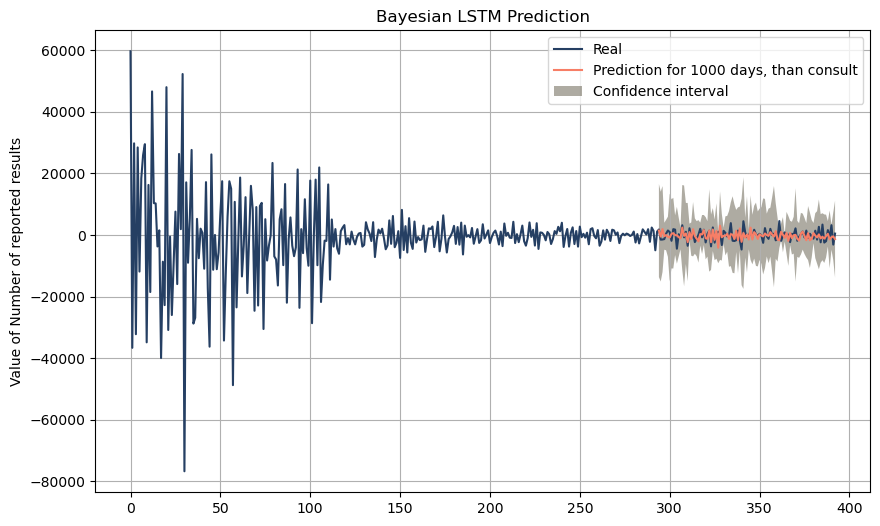

In [237]:
plt.figure(figsize=(10,6))

params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black"}

plt.rcParams.update(params)


plt.plot(df_pred.index,
         df_pred["Number of reported results"],
         color='#253F63',
         label="Real")

plt.plot(idx_pred,
         pred_mean_unscaled,
         label="Prediction for {} days, than consult".format(future_length),
         color="#F77E66")

plt.fill_between(x=idx_pred,
                 y1=upper_bound_unscaled[:,0],
                 y2=lower_bound_unscaled[:,0],
                 facecolor='#5E5946',
                 label="Confidence interval",
                 alpha=0.5)

plt.title("Bayesian LSTM Prediction")
plt.ylabel("Value of Number of reported results")
plt.grid()
plt.legend()
plt.savefig("predictTS.svg")